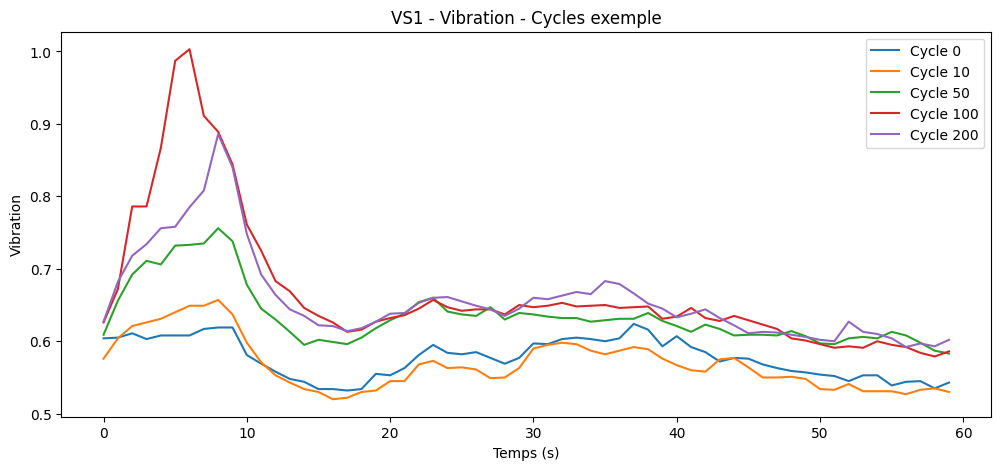

In [ ]:
#Graphique temporelle
import pandas as pd
import matplotlib.pyplot as plt

vs1 = pd.read_csv("VS1.txt", sep="\t", header=None)

plt.figure(figsize=(12, 5))
for i in [0, 10, 50, 100, 200]:
    plt.plot(vs1.iloc[i].values, label=f"Cycle {i}")

plt.title("VS1 - Vibration - Cycles exemple")
plt.xlabel("Temps (s)")
plt.ylabel("Vibration")
plt.legend()
plt.show()

C:\Users\boudi\AppData\Local\Temp\ipykernel_1892\1704960515.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([means, medians], labels=["Mean", "Median"])


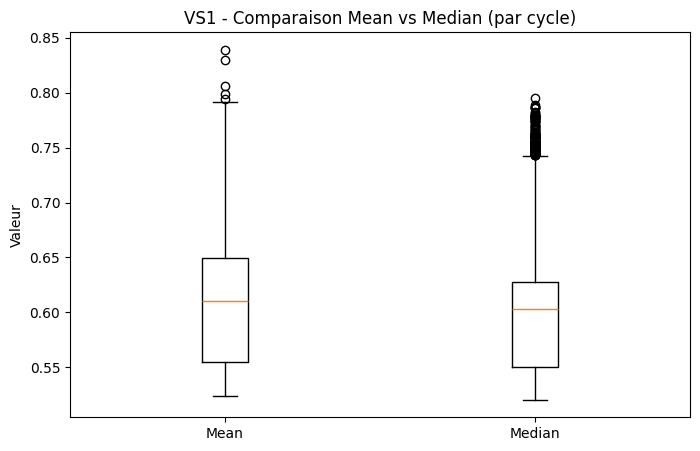

In [4]:
import numpy as np

means = vs1.mean(axis=1)
medians = vs1.median(axis=1)

plt.figure(figsize=(8, 5))
plt.boxplot([means, medians], labels=["Mean", "Median"])
plt.title("VS1 - Comparaison Mean vs Median (par cycle)")
plt.ylabel("Valeur")
plt.show()


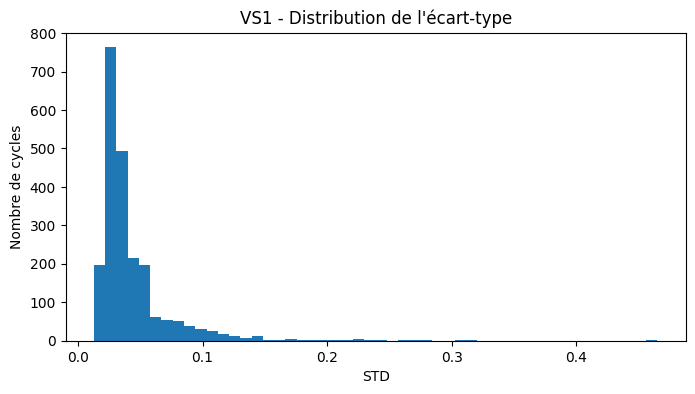

In [5]:
stds = vs1.std(axis=1)

plt.figure(figsize=(8, 4))
plt.hist(stds, bins=50)
plt.title("VS1 - Distribution de l'écart-type")
plt.xlabel("STD")
plt.ylabel("Nombre de cycles")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

vs1 = pd.read_csv("VS1.txt", sep="\t", header=None)

print(f"Nombre de cycles : {vs1.shape[0]}")
print(f"Nombre de points par cycle : {vs1.shape[1]}")

# Calcul des statistiques PAR CYCLE
vs1_std = vs1.std(axis=1)
vs1_max = vs1.max(axis=1)
vs1_mean = vs1.mean(axis=1)
vs1_median = vs1.median(axis=1)

#DataFrame final VS1
vs1_features = pd.DataFrame({
    "VS1_std": vs1_std,
    "VS1_max": vs1_max,
    "VS1_mean": vs1_mean,
    "VS1_median": vs1_median
})


print("\nAperçu des features VS1 (par cycle) :")
print(vs1_features.head(30))

print("\n" + "=" * 50)
print("STATISTIQUES GLOBALES DES FEATURES VS1")
print("=" * 50)
print(vs1_features.describe())
print("=" * 50)


Nombre de cycles : 2205
Nombre de points par cycle : 60

Aperçu des features VS1 (par cycle) :
     VS1_std  VS1_max  VS1_mean  VS1_median
0   0.027078    0.624  0.576950      0.5770
1   0.027241    0.626  0.565850      0.5595
2   0.036729    0.662  0.576533      0.5620
3   0.033464    0.645  0.569267      0.5550
4   0.033484    0.660  0.577367      0.5760
5   0.030731    0.643  0.572683      0.5665
6   0.032888    0.649  0.573033      0.5660
7   0.037949    0.669  0.572000      0.5620
8   0.032562    0.650  0.567067      0.5590
9   0.031814    0.653  0.571683      0.5665
10  0.035669    0.657  0.568700      0.5630
11  0.034495    0.662  0.578150      0.5675
12  0.035125    0.681  0.584233      0.5735
13  0.038407    0.671  0.588567      0.5715
14  0.033468    0.671  0.582467      0.5760
15  0.035149    0.675  0.582367      0.5705
16  0.031460    0.666  0.584900      0.5810
17  0.043090    0.696  0.593083      0.5785
18  0.030539    0.688  0.603900      0.5945
19  0.037057    0.715  0.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# VS1 est une feature par cycle
vs1 = vs1_features["VS1_std"] 

# Calcul z-score
z_scores = zscore(vs1)

# Détection outliers
outliers_z = np.abs(z_scores) > 3

print("Nombre d'outliers (Z-score > 3) :", outliers_z.sum())
print("Pourcentage :", outliers_z.mean() * 100)


Nombre d'outliers (Z-score > 3) : 42
Pourcentage : 1.9047619047619049


In [8]:
Q1 = vs1.quantile(0.25)
Q3 = vs1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (vs1 < lower_bound) | (vs1 > upper_bound)

print("Nombre d'outliers (IQR) :", outliers_iqr.sum())
print("Pourcentage :", outliers_iqr.mean() * 100)


Nombre d'outliers (IQR) : 195
Pourcentage : 8.843537414965986
